<a href="https://colab.research.google.com/github/engin3r101/character-recognition/blob/main/Character_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import requests

In [ ]:
from google.colab import files
files.upload()  # upload kaggle.json here


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d vaibhao/handwritten-characters

In [ ]:
!unzip handwritten-characters.zip -d ./data

In [ ]:
dataset_path = './data/Train'

image_size = (32, 32) # Define your desired image size
batch_size = 32 # Define your desired batch size

image_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred', # Infer labels from subdirectory names
    label_mode='int',   # Labels as integers
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

Found 834036 files belonging to 39 classes.


In [ ]:
image_dataset.class_names

['#',
 '$',
 '&',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [ ]:
help(image_dataset)

Help on _PrefetchDataset in module tensorflow.python.data.ops.prefetch_op object:

class _PrefetchDataset(tensorflow.python.data.ops.dataset_ops.UnaryUnchangedStructureDataset)
 |  _PrefetchDataset(input_dataset, buffer_size, slack_period=None, name=None)
 |
 |  A `Dataset` that asynchronously prefetches its input.
 |
 |  Method resolution order:
 |      _PrefetchDataset
 |      tensorflow.python.data.ops.dataset_ops.UnaryUnchangedStructureDataset
 |      tensorflow.python.data.ops.dataset_ops.UnaryDataset
 |      tensorflow.python.data.ops.dataset_ops.DatasetV2
 |      collections.abc.Iterable
 |      tensorflow.python.trackable.base.Trackable
 |      tensorflow.python.framework.composite_tensor.CompositeTensor
 |      tensorflow.python.types.data.DatasetV2
 |      abc.ABC
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, input_dataset, buffer_size, slack_period=None, name=None)
 |      See `Dataset.prefetch()` for details.
 |
 |  -----------------------------

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(39, activation='linear')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [ ]:
model.fit(image_dataset)

/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


26064/26064 ━━━━━━━━━━━━━━━━━━━━ 1058s 41ms/step - accuracy: 0.8661 - loss: 0.6071


In [ ]:
dataset_validation_path = './data/Validation'

image_size = (32, 32) # Define your desired image size
batch_size = 32 # Define your desired batch size

image_validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_validation_path,
    labels='inferred', # Infer labels from subdirectory names
    label_mode='int',   # Labels as integers
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

Found 22524 files belonging to 39 classes.


In [ ]:
print((image_validation_dataset))

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
# Take one batch
for images, labels in image_validation_dataset.take(1):
    print("Batch shape:", images.shape)   # e.g. (32, 32, 32, 1)
    print("Labels shape:", labels.shape)  # e.g. (32,)

    # First image and label in the batch
    first_image = images[0].numpy()
    first_label = labels[0].numpy()

    print("First image shape:", first_image.shape)
    print("First label:", first_label)


Batch shape: (32, 32, 32, 3)
Labels shape: (32,)
First image shape: (32, 32, 3)
First label: 14


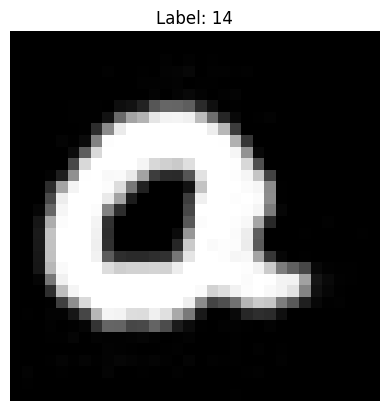

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(first_image.squeeze(), cmap="gray")  # squeeze if shape is (32,32,1)
plt.title(f"Label: {first_label}")
plt.axis("off")
plt.show()


In [ ]:
images, labels = next(iter(image_validation_dataset))

In [ ]:
print(images[0])

tf.Tensor(
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], shape=(32, 32, 3), dtype=uint8)


In [ ]:
first_image = 0
first_label = 0
for images, labels in image_validation_dataset.take(1):
    first_image = images[0]   # shape (32,32,1)
    first_label = labels[0]
    break
first_image_batch = tf.expand_dims(first_image, axis=0)  # shape (1,32,32,1)
logits = model.predict(first_image_batch)   # shape (1, num_classes)
probs = tf.nn.softmax(logits[0])  # convert to probabilities
predicted_class = tf.argmax(probs).numpy()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


In [ ]:
print("True label:", first_label.numpy())
print("Predicted class:", predicted_class)
print("Class probabilities:", probs.numpy())


True label: 7
Predicted class: 7
Class probabilities: [0.02455982 0.02455982 0.02455982 0.02455982 0.02455983 0.02455982
 0.02455982 0.06670696 0.02455982 0.02455982 0.02455992 0.02455982
 0.02456005 0.02455982 0.02455982 0.02455982 0.02455982 0.02455982
 0.02455982 0.02455982 0.02455982 0.02455982 0.02455982 0.02455982
 0.02455982 0.02455983 0.02455982 0.02455982 0.02455982 0.02455983
 0.02455982 0.02455982 0.02455984 0.02455983 0.02455983 0.02455982
 0.02455982 0.02457919 0.02455982]


In [ ]:
dictionary = {}
for i in range(len(image_validation_dataset.class_names)):
  dictionary[i] = image_validation_dataset.class_names[i]
print("Final prediction :",dictionary[predicted_class])

Final prediction : 4


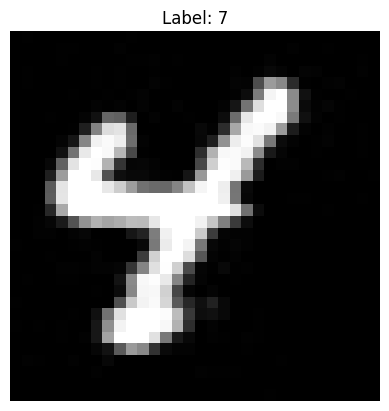

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(first_image.numpy().squeeze(), cmap="gray")
plt.title(f"Label: {first_label}")
plt.axis("off")
plt.show()